# 23회

[![Hits](https://hits.seeyoufarm.com/api/count/incr/badge.svg?url=https%3A%2F%2Fwww.datamanim.com%2Fdataset%2FADPpb%2F00%2Fp1.html&count_bg=%23582382&title_bg=%23555555&icon=&icon_color=%23E7E7E7&title=hits&edge_flat=false)](https://hits.seeyoufarm.com)

```{attention} 
**[캐글에 업로드된 다른 분들 코드 보러가기](https://www.kaggle.com/datasets/kukuroo3/adp-kr-p1/code)**   
**[데이터셋 링크](https://github.com/Datamanim/datarepo/tree/main/adp/p1)**    
**문제오류, 코드오류 댓글로 피드백주세요**
```

## 기계학습(50점)

```{attention} 
**1번**    
     
**온,습도,조도,CO2농도에 따른 객실의 사용유무 판별**    
**종속변수 Occupancy, 0: 비어있음 , 1: 사용중**    
**데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+**    
**data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv**
```

In [1]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv')
df.head()

date  Temperature  Humidity       Light     CO2  \
0  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.40   
1  2015-02-02 14:22:00      23.7225    26.125  493.750000  774.75   
2  2015-02-02 14:23:00      23.7540    26.200  488.600000  779.00   
3  2015-02-02 14:23:59      23.7600    26.260  568.666667  790.00   
4  2015-02-02 14:25:59      23.7540    26.290  509.000000  797.00   

   HumidityRatio  Occupancy  
0       0.004773          1  
1       0.004744          1  
2       0.004767          1  
3       0.004779          1  
4       0.004783          1

```{admonition} 1-1번
**데이터  EDA 수행 후, 분석가 입장에서 의미있는 탐색**
```

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB
None

결측치가 일부 존재하며 데이터 타입은 date컬럼을 제외하고 모두 float형식이다. 



date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64


['2015-02-03 19:09:59' '2015-02-03 19:31:00' '2015-02-04 18:08:00'
 '2015-02-05 06:08:00' '2015-02-05 16:09:59' '2015-02-08 08:06:00'
 '2015-02-08 11:54:00' '2015-02-08 20:58:59' '2015-02-09 06:04:59'
 '2015-02-09 07:31:00' '2015-02-09 07:49:00' '2015-02-10 07:53:59'
 '2015-02-12 00:34:00' '2015-02-12 10:53:00' '2015-02-12 15:04:00'
 '2015-02-12 20:38:00' '2015-02-13 22:53:59' '2015-02-15 16:41:59'
 '2015-02-16 00:53:59' '2015-02-17 01:56:00' '2015-02-18 06:20:00']

결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.


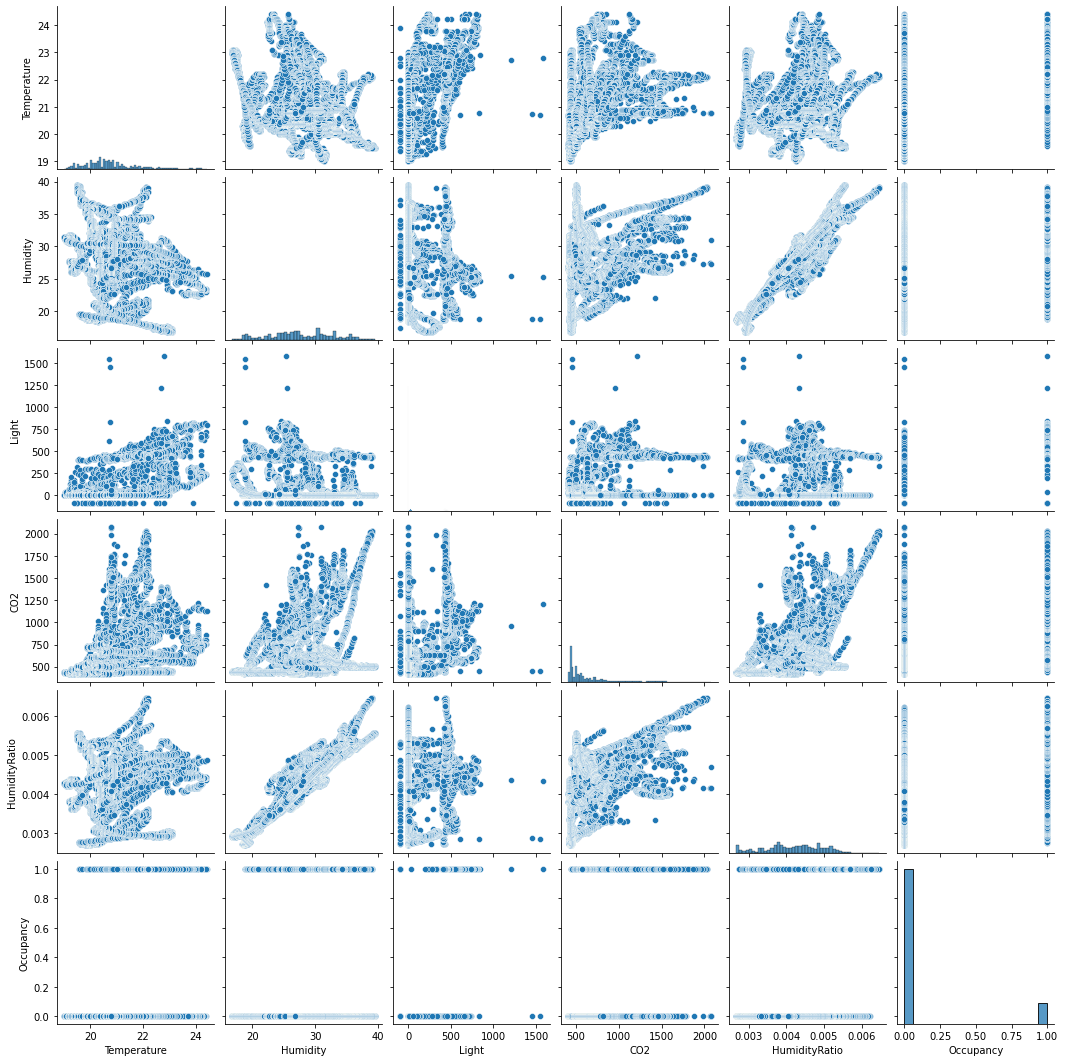

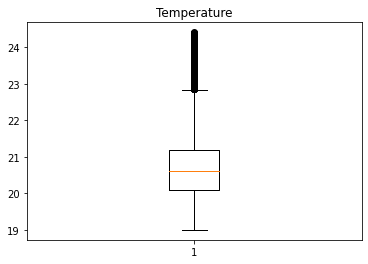

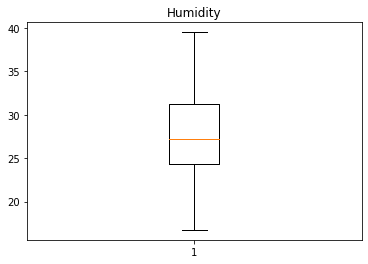

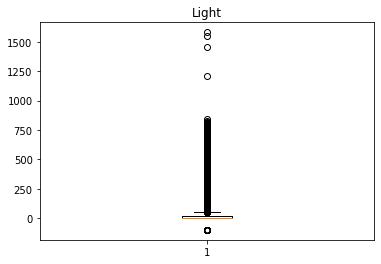

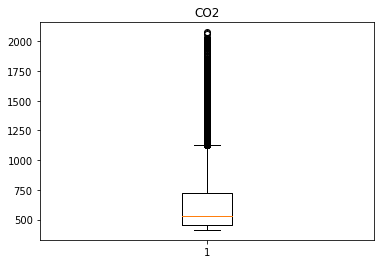

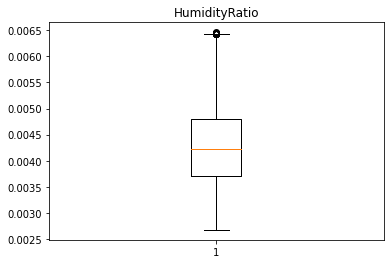


Humidity, HumidityRatio컬럼은 높은 상관관계를 보이며, 두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다



(50, 7)

Temperature      Humidity         Light           CO2  HumidityRatio  \
count  17910.000000  17910.000000  17910.000000  17889.000000   17910.000000   
mean      20.749036     27.589163     78.157369    647.700865       0.004175   
std        0.994012      5.043595    168.574068    285.997340       0.000755   
min       19.000000     16.745000    -99.000000    412.750000       0.002674   
25%       20.100000     24.390000      0.000000    453.000000       0.003702   
50%       20.600000     27.200000      0.000000    532.666667       0.004222   
75%       21.200000     31.290000     22.000000    722.000000       0.004790   
max       24.408333     39.500000   1581.000000   2076.500000       0.006461   

          Occupancy  
count  17910.000000  
mean       0.117253  
std        0.321730  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000


Light컬럼의 경우 -99인 값이 50개 존재한다. 



count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64



75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다. 
연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼수 있다



In [7]:
import pandas as pd
print(df.info())
print('''
결측치가 일부 존재하며 데이터 타입은 date컬럼을 제외하고 모두 float형식이다. 
''')


display(df.isnull().sum())
print()
print(df[df.CO2.isnull()].date.values)
print('\n결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.')



import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()
for v in df.select_dtypes(include='float'):
    target = df[v].dropna()
    plt.boxplot(target)
    plt.title(v)
    plt.show()
    
print('''
Humidity, HumidityRatio컬럼은 높은 상관관계를 보이며, 두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다
''')



display(df[df.Light <0].shape)
display(df.describe())
print('''
Light컬럼의 경우 -99인 값이 50개 존재한다. 
''')


df['date'] = pd.to_datetime(df['date'])
timedeltas = df['date'].diff().dt.seconds.dropna()
display(timedeltas.describe())
print()
print('''
75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다. 
연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼수 있다
''')

```{admonition} 1-2번
**결측치를 대체하는 방식 선택하고 근거제시, 대체 수행**
```

In [9]:
print('''
CO2 컬럼에 nan값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy값이 변화하지 않거나,      
date값이 3분이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체 한다.      
위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 데이터의 품질을 손상 시키지 않다고 판단 할 수 있다
''')

for value in df[df.CO2.isnull()].index:
    target = df.iloc[value-1:value+2]
    difftime = target['date'].diff().dt.seconds.dropna()
    if target.Occupancy.nunique() ==1 and len(difftime[difftime>180]) ==0:
        df.loc[value,'CO2'] =df.loc[value-1].CO2
        
display(df.isnull().sum())

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

```{admonition} 1-3번
**추가적으로 데이터의 질 및 품질관리를 향상시킬만한 내용 작성**
```

In [11]:
print('''
Light 컬럼의 -99는 예외값에 대해 임의 값을 입력한 것으로 보인다. -99를 제외한 컬럼의 최솟값인 0으로 대체한다. 평균적으로 시간은 1분 간격의 데이터이다.     
하지만 최대 7시간의 공백이 존재한다. 이를 보간 해주는 것도 방법 일수 있지만,시계열 모델을 사용하지 않을 것이기에 보간을 따로 해주지 않고 모델링을 진행한다.
''')
df.loc[df.Light ==-99,'Light'] = 0

```{admonition} 2-1번
**데이터에 불균형이 있는지 확인, 불균형 판단 근거 작성**
```

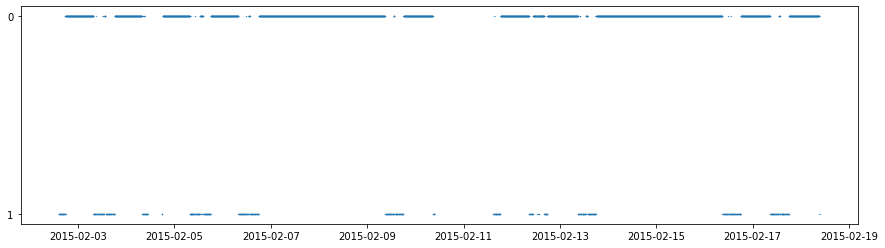


Occupancy 의 경우 7:1의 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일~9일 , 2월 14~16일까지는 객실이 비어있다. 이처럼 객실이 비어있지 않는 경우 보다 비어있는 경우가 더 많기에 불균형이 존재한다



In [12]:
plt.figure(figsize=(15,4))
plt.scatter(df['date'],df['Occupancy'].astype('str'),s=0.03)
plt.show()
df.Occupancy.value_counts()

print('''
Occupancy 의 경우 7:1의 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일~9일 , 2월 14~16일까지는 객실이 비어있다. 이처럼 객실이 비어있지 않는 경우 보다 비어있는 경우가 더 많기에 불균형이 존재한다
''')

```{admonition} 2-2번
**오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시**
```

In [34]:
print('''*랜덤오버샘플링*     
소수 클래스 데이터중 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식     
장점 : 데이터 불균형 문제 해결     
단점 : 종속변수에 대한 고려없이 중복 생성, overfitting의 가능성이 존재     

*SMOTE*           
소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법     
장점 : 데이터 불균형 문제 해결, 데이터 분포를 고려한 중복없는 데이터 생성    
단점 : 고차원 데이터에는 문제가 발생할 수 있다     
''')

*랜덤오버샘플링*     
소수 클래스 데이터중 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식     
장점 : 데이터 불균형 문제 해결     
단점 : 종속변수에 대한 고려없이 중복 생성, overfitting의 가능성이 존재     

*SMOTE*           
소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법     
장점 : 데이터 불균형 문제 해결, 데이터 분포를 고려한 중복없는 데이터 생성    
단점 : 고차원 데이터에는 문제가 발생할 수 있다     



```{admonition} 2-3번
**오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라**
```

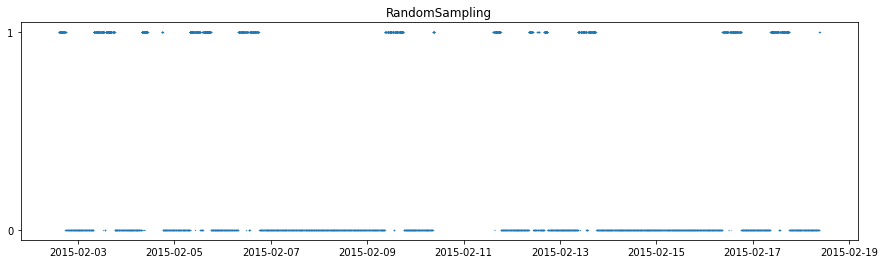

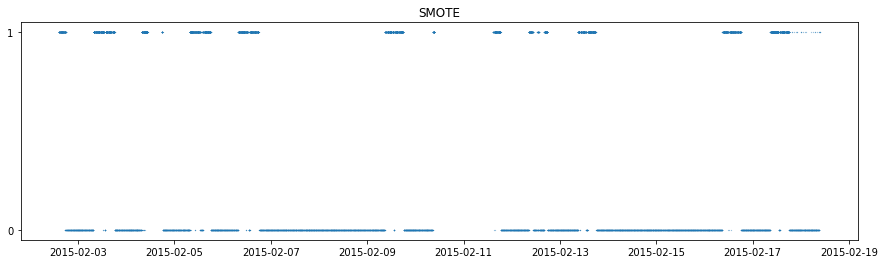


RandomSampling 대비 SMOTE에서 좀 더 다양한 차원의 샘플이 생성됨을 볼수 있다. (02-18일 부근)



In [14]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# train,test 데이터를 분리하고 train 데이터에 대해서만 오버 샘플링을 진행한다 
X  =df.drop(columns=['Occupancy'])
y  =df['Occupancy']

X_train , X_test , y_train, y_test  = train_test_split(X,y,stratify=y,random_state=43,test_size=0.35)


from imblearn.over_sampling import RandomOverSampler,SMOTE

#datetime 형태로는 샘플링 할수 없기에 timestamps 형식으로 바꿔서 샘플링을 진행한다
X_train.loc[:,'datetime'] = X_train['date'].view('int') // 10**9
X_test.loc[:,'datetime'] = X_test['date'].view('int') // 10**9


from sklearn.preprocessing import StandardScaler


X_imb  = X_train.drop(columns = ['date']).reset_index(drop=True).copy()
y_imb  = y_train.reset_index(drop=True).copy()

X_samp, y_samp = RandomOverSampler(random_state=2022).fit_resample(X_imb,y_imb)
total = pd.concat([X_samp,y_samp],axis=1)
total['date'] = pd.to_datetime(total['datetime'], unit='s')


SMOTE_X_samp, SMOTE_y_samp = SMOTE(random_state=2022).fit_resample(X_imb,y_imb)
SMOTE_total = pd.concat([SMOTE_X_samp,SMOTE_y_samp],axis=1)
SMOTE_total['date'] = pd.to_datetime(SMOTE_total['datetime'], unit='s')


plt.figure(figsize=(15,4))
plt.title('RandomSampling')
plt.scatter(total['date'],total['Occupancy'].astype('str'),s=0.03)
plt.show()



plt.figure(figsize=(15,4))
plt.title('SMOTE')
plt.scatter(SMOTE_total['date'],SMOTE_total['Occupancy'].astype('str'),s=0.03)
plt.show()

print('''
RandomSampling 대비 SMOTE에서 좀 더 다양한 차원의 샘플이 생성됨을 볼수 있다. (02-18일 부근)
''')

```{admonition} 3-1번
**속도측면, 정확도측면 모델 1개씩 선택, 선택 이유도 기술**
```

In [ ]:
print('''
이진 분류 문제이다.     
속도측면에서는 linear regression,    
정확도 측면에서는 randomforest classifier를 선택하여 분석을 진행하겠다     
''')

```{admonition} 3-2번
**위에서 오버샘플링 한 데이터 2개, 오버샘플링 하기 전 데이터 1개에 대해 모델 2개를 적용하고 성능 보여주기**
```

In [16]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler


# 불필요 컬럼제거 및 스케일링

if 'date' in X_train.columns:
    X_train = X_train.drop(columns=['date'])
    
if 'date' in X_test.columns:
    X_test = X_test.drop(columns=['date'])




result_auc_train = []
result_auc_test = []
result_time = []
for train_X,trainy in [(X_train,y_train),(X_samp, y_samp),(SMOTE_X_samp, SMOTE_y_samp)]:
    
    trainX = train_X.copy()
    testX = X_test.copy()
    sc = MinMaxScaler()    
    trainX = sc.fit_transform(trainX)
    testX = sc.transform(testX)
    
    
    lrstart = time.time()
    lr =LogisticRegression()
    lr.fit(trainX,trainy)
    lrend = time.time() - lrstart

    pred_lr = lr.predict(testX)
    auc_lr_train = roc_auc_score(trainy,lr.predict(trainX))
    auc_lr = roc_auc_score(y_test,pred_lr)
    
    rfstart = time.time()
    rf =RandomForestClassifier()
    rf.fit(trainX,trainy)
    rfend = time.time() - rfstart
    
    pred_rf  = rf.predict(testX)
    auc_rf_train  = roc_auc_score(trainy,rf.predict(trainX))
    auc_rf  = roc_auc_score(y_test,pred_rf)
    
    result_auc_test.append([auc_lr,auc_rf])
    result_time.append([lrend,rfend])
    result_auc_train.append([auc_lr_train,auc_rf_train])
    
#logistic regression 과 randomforest 분류기를 샘플링방식에 따른 학습시 정확도와 모델 학습 시간에 대해서 평가했다.

print('훈련셋 모델 auc 결과')
result_auc_trains = pd.DataFrame(result_auc_train)
result_auc_trains.index = ['raw','randomSampling','SMOTE']
result_auc_trains.columns = ['logistic','randomforest']
display(result_auc_trains)

print('테스트셋 모델 auc 결과')
result_auc_tests = pd.DataFrame(result_auc_test)
result_auc_tests.index = ['raw','randomSampling','SMOTE']
result_auc_tests.columns = ['logistic','randomforest']
display(result_auc_tests)

print('모델 학습시간 (sec)')
result_times = pd.DataFrame(result_time)
result_times.index = ['raw','randomSampling','SMOTE']
result_times.columns = ['logistic','randomforest']
result_times

훈련셋 모델 auc 결과


logistic  randomforest
raw             0.987030           1.0
randomSampling  0.989879           1.0
SMOTE           0.991096           1.0

테스트셋 모델 auc 결과


logistic  randomforest
raw             0.988823      0.986947
randomSampling  0.987016      0.988627
SMOTE           0.987107      0.990125

모델 학습시간 (sec)


logistic  randomforest
raw             0.021986      0.593129
randomSampling  0.031428      1.072121
SMOTE           0.030716      1.610574

```{admonition} 3-3번
**위 예측결과 사용해서 오버샘플링이 미친 영향에 대해 작성하라**
```

In [ ]:
print('''
logistic regression의 경우 학습시간은 random forest에 비해 낮게 나왔지만 모델 성능의 경우 train셋의 경우 모두 낮게 나왔으며 test셋의 경우 업샘플링을 하지 않은 경우를 제외하고는 모두 성능이 낮게 나왔다. 
randomforest의 경우 학습 모델의 경우 auc값이 1로 오버피팅 됐다. test셋에 대해서는 raw , randomSampling, SMOTE 순서로 auc값이 증가하는것을 확인 할수 있다
''')

## 통계분석(50점)

```{attention} 
**2번**    
     
**공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오**     
**data Url :  https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem2.csv**
```

In [17]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem2.csv')
df.head()

name  life span
0  sample1      10000
1  sample2       9000
2  sample3       9500
3  sample4      10000
4  sample5      10000

```{admonition} 1번
**귀무가설, 연구가설 세우기**
```

In [ ]:
print('''
귀무가설 : 데이터의 중위수는 1만 시간이다     
연구가설 : 데이터의 중위수는 1만 시간이 아니다''')

```{admonition} 2번
**유효한 데이터의 개수는?**
```

In [19]:
print('중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 : ',df[df['life span']==10000].shape[0])

df_fillter = df[df['life span'] != 10000]

중위수와 동일한 값들은 순위 부호 검정에서 불필요한 데이터이다. 그 숫자는 :  4


```{admonition} 3번
**검정통계량 및 연구가설 채택 여부를 작성하라**
```

In [20]:
from scipy.stats import wilcoxon
static, pvalue = wilcoxon(df_fillter['life span']-10000)
print('검정통계량은 ',static,'이다. pvalue는 ',pvalue,'로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 연구가설을 채택하지 않는다. ')

검정통계량은  8.5 이다. pvalue는  0.1953125 로 5% 유의 수준에서 귀무가설을 기각할 수 없다. 연구가설을 채택하지 않는다. 


```{attention} 
**3번**    
     
**코로나 시계열 데이터**    
**일자/국가명/확진자수**    
**데이터 출처(후처리과정 미포함) :https://www.kaggle.com/antgoldbloom/covid19panels?select=country_panel.csv** 
**데이터 url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem3_covid2.csv**
```

In [24]:
import pandas as pd
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem3_covid2.csv')
df.head()

location        date  new_cases
0  Austria  2021-01-01     2096.0
1  Austria  2021-01-02     1391.0
2  Austria  2021-01-03     1466.0
3  Austria  2021-01-04     1642.0
4  Austria  2021-01-05     2311.0

```{admonition} 1번
**데이터는 일자별 각 나라의 일일 확진자수를 나타낸다. 각 나라의 일자별 누적확진자 수를 나타내는 데이터 프레임을 생성하라**
```

In [25]:
target = df.groupby(['location','date']).sum().groupby(level=0).cumsum()
target.columns = ['cumulative sum']
target = target.reset_index()
target

location        date  cumulative sum
0      Austria  2021-01-01          2096.0
1      Austria  2021-01-02          3487.0
2      Austria  2021-01-03          4953.0
3      Austria  2021-01-04          6595.0
4      Austria  2021-01-05          8906.0
...        ...         ...             ...
11890  Vanuatu  2021-10-28             5.0
11891  Vanuatu  2021-10-29             5.0
11892  Vanuatu  2021-10-30             5.0
11893  Vanuatu  2021-10-31             5.0
11894  Vanuatu  2021-11-01             5.0

[11895 rows x 3 columns]

```{admonition} 2번
**1에서 구한 데이터를 각 나라별로 acf값을 구하고(lag는 50개까지 구하고 첫번째 값을 제외하라) 국가를 기준으로 유클리디안 거리를 기준으로 클러스터링을 진행 후 계층적 군집 분석을 위해 덴드로그램 작성하라**
```

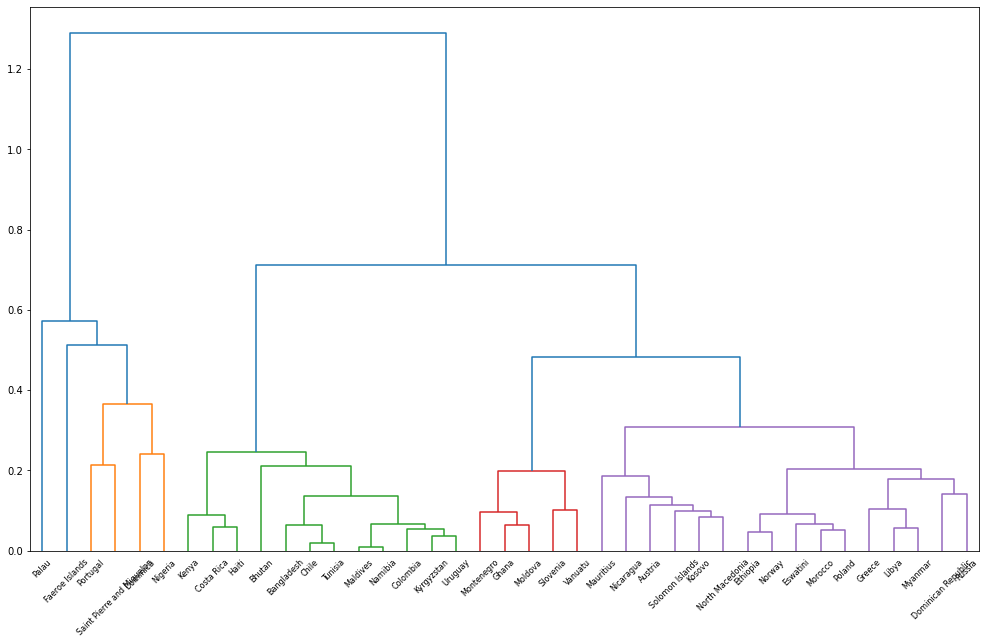

In [28]:
from scipy.spatial import distance
import statsmodels.api as sm
import numpy as np
name =[]
for lo in target.location.unique():
    
    v = sm.tsa.stattools.acf(target[target.location==lo]['cumulative sum'], nlags=50, fft=False)
    name.append([lo]+list(v[1:]))

v = pd.DataFrame(name)


import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


data =v.set_index(0)
label = np.array(data.index)

datav = data.values

fig = plt.figure(figsize=(17,10))

ax3 = fig.add_subplot(1,1,1)
dend3 = sch.linkage(datav, method='average', metric='euclidean')
cutoff = 0.3*max(dend3[:,2])
dend_res3 = sch.dendrogram(dend3, color_threshold=cutoff)
ax3.set_xticklabels(label[dend_res3['leaves']], minor=False)

plt.show()

```{attention} 
**4번**    
    
**아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라**     
```

![p4](https://github.com/Datamanim/datarepo/blob/main/adp/p1/problem4.png?raw=true)

```{admonition} 1번
**귀무가설, 연구가설 세우기**
```

In [ ]:
print('''
귀무가설 : 학과와 성적은 관련이 없다 (독립이다)     
연구가설 : 학과와 성적은 관련이 있다 (독립이 아니다)
''')

```{admonition} 2번
**학과와 성적이 독립일 경우의 기댓값을 구하시오**
```

In [30]:
df = pd.DataFrame({'사회과학':[15,60,24],'자연과학':[25,69,5],'공학':[10,77,13]})
df.index = ['1.5-2.5','2.5-3.5','3.5-4.5']
from scipy.stats import chi2_contingency,fisher_exact
chi2 , p ,dof, expected = chi2_contingency(df)
print(expected)

[[16.61073826 16.61073826 16.77852349]
 [68.43624161 68.43624161 69.12751678]
 [13.95302013 13.95302013 14.09395973]]


```{admonition} 3번
**검정통계량 구하고 연구가설의 채택여부 작성**
```

In [32]:
print(p)

# 카이 제곱 검정시 p-value는 0.00018로 귀무가설을 기각한다. 학과와 성적은 관련이 있다.

# 만약 5보다 작은 셀이 20%가 넘어가므로(75%) 피셔의 정확검정을 사용 해야한다. #print(fisher_exact(df))

0.00018822647762421383
